In [1]:
!pip install mnist
!pip install scikeras[tensorflow]

In [2]:
import numpy as np
import pandas as pd
import mnist
import keras
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
# import images
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255)
test_images = (test_images / 255)

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [4]:
to_categorical(test_labels)

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [5]:
# Вывод изображения из датасета в виде тензора
train_images[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

(-0.5, 27.5, 27.5, -0.5)

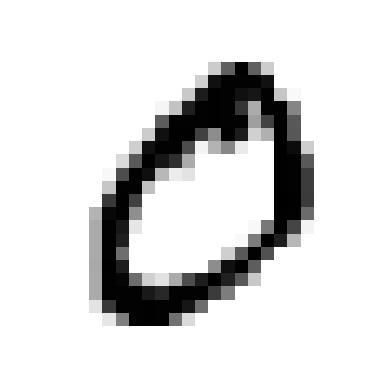

In [6]:
# Вывод изображения из датасета в виде картинки
plt.imshow(mnist.train_images()[1]/255, cmap='binary')
plt.axis('off')


In [7]:
input_shape = (28, 28, 1)

In [8]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [9]:
x_train = x_train / 255
x_test = x_test / 255

In [10]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [11]:
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(784,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [12]:
# Проверяем как работает наша функция создания модели и смотрим сколько параметров создает каждый из слоев.
model_test = create_model()
model_test.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Обучаем нашу тестовую модель

model_test.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32,
)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2942 - accuracy: 0.9153
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1350 - accuracy: 0.9602
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0977 - accuracy: 0.9709
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0784 - accuracy: 0.9758
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0649 - accuracy: 0.9799


In [14]:
# Оцениваем работу модели на тестовых данных через model_test.evaluate.
loss,metrics = model_test.evaluate(
  test_images,
  to_categorical(test_labels)
)
print('----------------------------')
print(f'loss - {np.round(loss,4)}, metrics - {np.round(metrics,4)}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0870 - accuracy: 0.9734
----------------------------
loss - 0.087, metrics - 0.9734


In [18]:
# Задание параметров для поиска GridSearchCV - поиск оптимальных параметров для нейронной сети.
param_grid = {'batch_size': [64, 128, 256],
              'epochs': [5, 10, 15],
              'optimizer': ['adam', 'sgd', 'rmsprop']}

In [19]:
# Создание экземпляра модели KerasClassifier и подбираем оптимальные параметры нейросети.
model = KerasClassifier(create_model)

grid = GridSearchCV(model, param_grid, refit = False, cv = 3, scoring = 'accuracy')

grid_result = grid.fit(train_images, to_categorical(train_labels))

print(grid_result.best_score_, grid_result.best_params_)

Epoch 1/5
625/625 [==============================] - 4s 4ms/step - loss: 0.4142 - accuracy: 0.8799
Epoch 2/5
625/625 [==============================] - 3s 5ms/step - loss: 0.1727 - accuracy: 0.9493
Epoch 3/5
625/625 [==============================] - 4s 6ms/step - loss: 0.1285 - accuracy: 0.9617
Epoch 4/5
625/625 [==============================] - 3s 5ms/step - loss: 0.0999 - accuracy: 0.9691
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
Epoch 1/5
625/625 [==============================] - 4s 5ms/step - loss: 0.4035 - accuracy: 0.8871
Epoch 2/5
625/625 [==============================] - 2s 4ms/step - loss: 0.1865 - accuracy: 0.9469
Epoch 3/5
625/625 [==============================] - 2s 4ms/step - loss: 0.1394 - accuracy: 0.9592
Epoch 4/5
625/625 [==============================] - 2s 4ms/step - loss: 0.1109 - accuracy: 0.9669
Epoch 5/5
313/313 [==============================] - 1s 3ms/step
Epoch 1/5
625/625 [==============================] - 4s 5ms/step - loss: 0.426

In [20]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.968033 using {'batch_size': 128, 'epochs': 15, 'optimizer': 'rmsprop'}


GridSearch подобрал нам оптимальные параметры под текущую архитектуру нейросети.
0.968033 using {'batch_size': 128, 'epochs': 15, 'optimizer': 'rmsprop'}
Однако сразу стоит замепить важный практический момент подобного подбора - это огромная требовательность к вычислительной мощности рабочей станции и большие затраты времени. Для нашей не самой большой задачи процесс подбора занял 31 минуту.

In [21]:
# Используя оптимальные параметры изменим архитектуру нейросети с добавление больешго количества нейронов.
model_hight = keras.Sequential([

    keras.Input(shape=input_shape),
    Flatten(),
    Dense(90, activation = 'relu'),
    Dense(60, activation = 'relu'),
    Dense(10, activation = 'softmax')
    ] )

In [22]:
model_hight.compile(optimizer='RMSprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [25]:
%%time

history = model_hight.fit(x_train, y_train_cat, batch_size=128, epochs=15)

Epoch 1/15
469/469 [==============================] - 3s 5ms/step - loss: 0.0654 - accuracy: 0.9796
Epoch 2/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0552 - accuracy: 0.9832
Epoch 3/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0476 - accuracy: 0.9849
Epoch 4/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0412 - accuracy: 0.9875
Epoch 5/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0354 - accuracy: 0.9887
Epoch 6/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0306 - accuracy: 0.9903
Epoch 7/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0266 - accuracy: 0.9916
Epoch 8/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0230 - accuracy: 0.9929
Epoch 9/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0206 - accuracy: 0.9933
Epoch 10/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0174 - accuracy: 0.9945

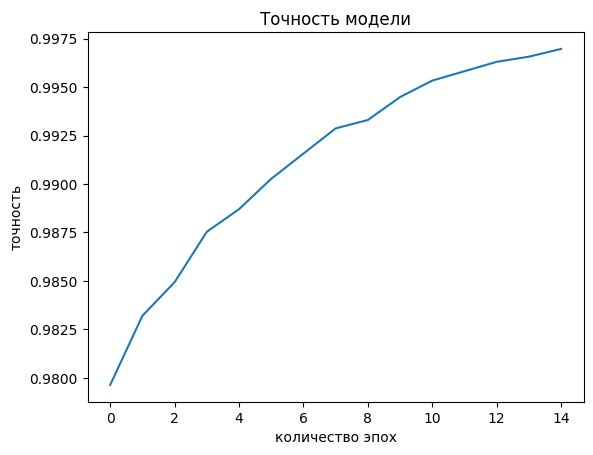

In [26]:
plt.plot(history.history['accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.show()

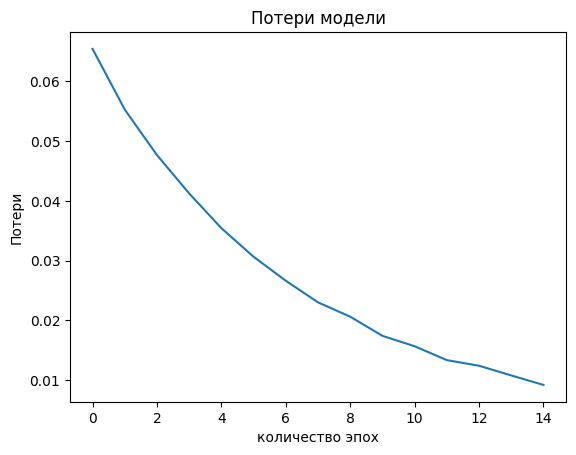

In [27]:
plt.plot(history.history['loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.show()

In [28]:
model_hight.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.1141 - accuracy: 0.9763


[0.1140831783413887, 0.9763000011444092]

In [29]:
%%time

history = model_hight.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0193 - accuracy: 0.9933 - val_loss: 0.1379 - val_accuracy: 0.9743
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0202 - accuracy: 0.9932 - val_loss: 0.1337 - val_accuracy: 0.9744
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0196 - accuracy: 0.9936 - val_loss: 0.1337 - val_accuracy: 0.9758
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0178 - accuracy: 0.9946 - val_loss: 0.1329 - val_accuracy: 0.9771
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0175 - accuracy: 0.9948 - val_loss: 0.1853 - val_accuracy: 0.9710
CPU times: user 43.4 s, sys: 2.35 s, total: 45.7 s
Wall time: 41.5 s


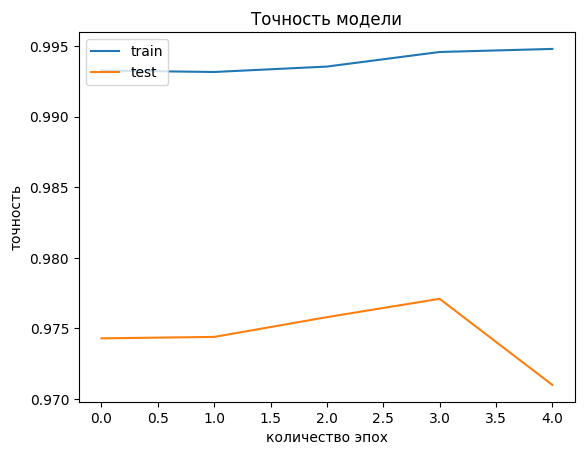

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

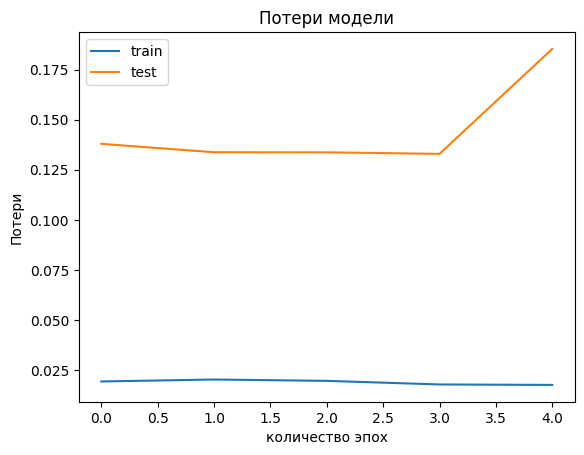

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Как ожидалось результаты улучшились. Теперь попробуем создать более экономичную модель нейросети.

In [34]:
model_low = keras.Sequential([

    keras.Input(shape=input_shape),
    Flatten(),
    Dense(32, activation = 'relu'),
    Dense(16, activation = 'relu'),
    Dense(10, activation = 'softmax')
    ] )

In [35]:
model_low.compile(optimizer='RMSprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [36]:
%%time

history = model_low.fit(x_train, y_train_cat, batch_size=128, epochs=15)

Epoch 1/15
469/469 [==============================] - 3s 5ms/step - loss: 0.5252 - accuracy: 0.8561
Epoch 2/15
469/469 [==============================] - 2s 3ms/step - loss: 0.2385 - accuracy: 0.9323
Epoch 3/15
469/469 [==============================] - 2s 3ms/step - loss: 0.1921 - accuracy: 0.9459
Epoch 4/15
469/469 [==============================] - 1s 3ms/step - loss: 0.1647 - accuracy: 0.9526
Epoch 5/15
469/469 [==============================] - 2s 3ms/step - loss: 0.1457 - accuracy: 0.9587
Epoch 6/15
469/469 [==============================] - 2s 3ms/step - loss: 0.1314 - accuracy: 0.9621
Epoch 7/15
469/469 [==============================] - 2s 3ms/step - loss: 0.1198 - accuracy: 0.9643
Epoch 8/15
469/469 [==============================] - 2s 5ms/step - loss: 0.1105 - accuracy: 0.9674
Epoch 9/15
469/469 [==============================] - 2s 4ms/step - loss: 0.1026 - accuracy: 0.9694
Epoch 10/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0963 - accuracy: 0.9713

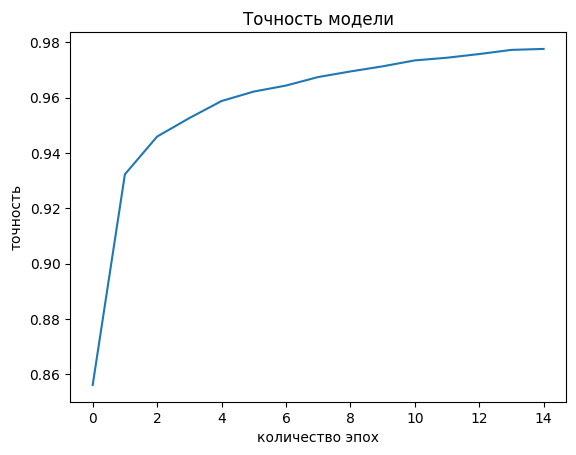

In [37]:
plt.plot(history.history['accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.show()

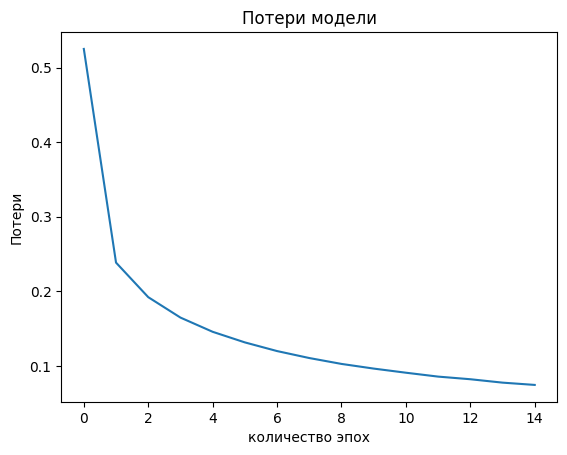

In [38]:
plt.plot(history.history['loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.show()

In [39]:
model_low.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.1124 - accuracy: 0.9666


[0.1123598963022232, 0.9666000008583069]

In [40]:
%%time

history = model_low.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0820 - accuracy: 0.9755 - val_loss: 0.1173 - val_accuracy: 0.9673
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0810 - accuracy: 0.9760 - val_loss: 0.1192 - val_accuracy: 0.9667
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0778 - accuracy: 0.9771 - val_loss: 0.1317 - val_accuracy: 0.9645
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0752 - accuracy: 0.9772 - val_loss: 0.1210 - val_accuracy: 0.9670
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0732 - accuracy: 0.9785 - val_loss: 0.1247 - val_accuracy: 0.9675
CPU times: user 30.2 s, sys: 1.63 s, total: 31.9 s
Wall time: 41.4 s


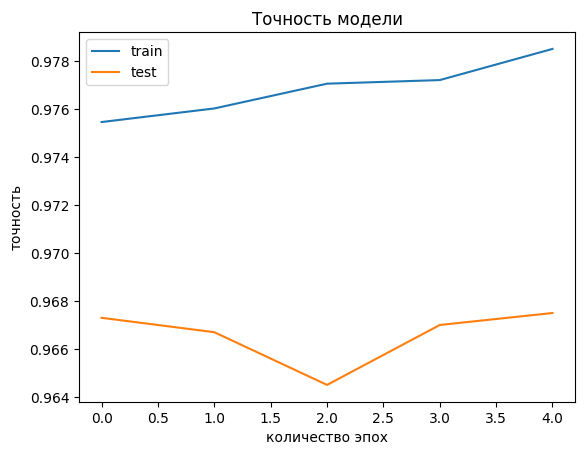

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

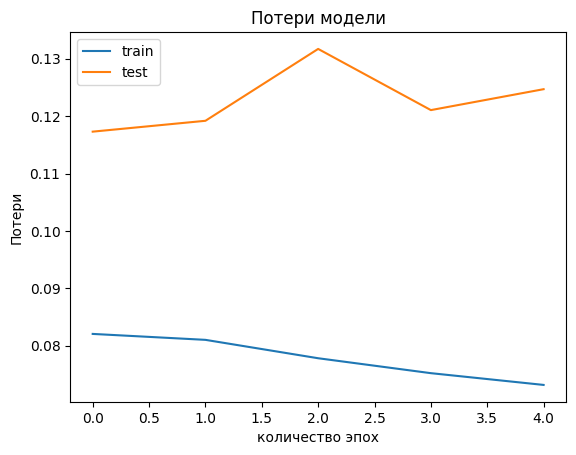

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Даже с меньшим количеством нейронов модель показывает хорошую предсказательную силу.
Однако максимальные значения модель показали при большем количестве параметров. Так же добавление дополнительного скрытого слоя улучшило итоговую эффективность.
Применение валидационой выборки позволяет решить проблему переобучения нейросети.
Так же полезно использовать модуль ModelCheckpoint для сохранения промежуточных результатов обучения или подбора параметров, особенно для тяжеловесной архитектуры и большого датасета.


